In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


# ACTIVITY 6

In [131]:

Data_Ana = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
Data_Ana_Clean = Data_Ana.drop(['Unnamed: 0'], axis = 1)
Data_Ana_Clean

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## 1. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [132]:
categorical_data = Data_Ana_Clean.select_dtypes('object')
categorical_data

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [133]:
dummy_data = pd.get_dummies(categorical_data)
dummy_data

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


## 2. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [134]:
numerical_data = Data_Ana_Clean._get_numeric_data()
numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [135]:
# customer_lifetime_value = numerical_data['customer_lifetime_value']
# income = numerical_data['income']
# monthly_premium_auto = numerical_data['monthly_premium_auto']
# months_since_last_claim = numerical_data['months_since_last_claim']
# months_since_policy_inception = numerical_data['months_since_policy_inception']## 3. remove the outliers from the numerical columns.


# from scipy.stats import scoreatpercentile as pct
# from scipy.stats import iqr

# def remove_outliers_costum():
#     pct_75 = pct(customer_lifetime_value, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
#    pct_25 = pct(customer_lifetime_value, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
#    upper_bound = pct_75 + 1.5*iqr(customer_lifetime_value)  # iqr - > Scipy function to calculate the Interquartile Range
#    lower_bound = pct_25 - 1.5*iqr(customer_lifetime_value)
#    customer_lifetime_value2 = customer_lifetime_value[(customer_lifetime_value <= upper_bound) & (customer_lifetime_value >= lower_bound)]  # Filter out the outliers
#    return customer_lifetime_value2


# remove_outliers_costum()

# NOTE: this works for only singular columns


In [136]:
# this is for removing the ouliers from all the columns.

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

numerical_data = numerical_data[~((numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]

numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
5,4745,50549,61,2,73,0,7,292
7,4956,87197,63,35,45,0,3,247
8,5989,66839,154,33,24,0,1,739
...,...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7,537
10676,9075,37722,116,8,23,0,8,158
10677,5807,62447,74,9,2,0,7,133
10680,4547,33531,116,11,15,0,1,801


## 4. check if there are highly correlated features and drop them if there are any.


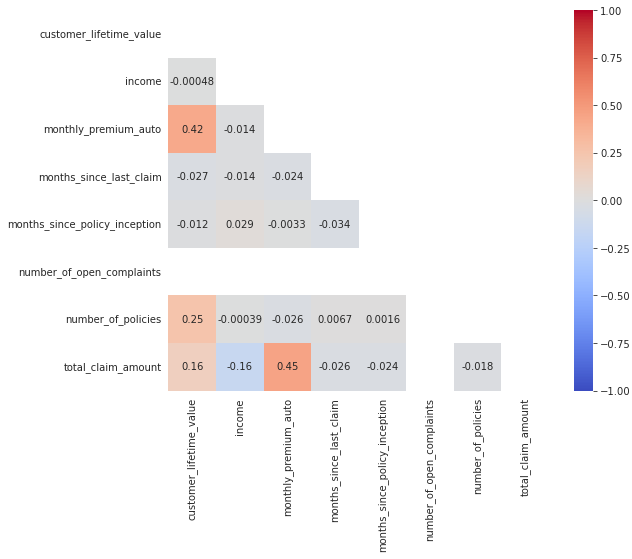

In [137]:

corr = numerical_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
    

# there are no correlations.

## 5. X-y split (y is the target variable which is the total claim amount)

In [138]:


# first I create a data frame with X= all numerical data without the target ('total_claim_amount') and y= total_claim_amount.


# axis=1  is the X axes and axis=0 is the Y axes.



In [139]:
X = numerical_data.drop('total_claim_amount', axis=1)
y = numerical_data.total_claim_amount

X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
5,4745,50549,61,2,73,0,7
7,4956,87197,63,35,45,0,3
8,5989,66839,154,33,24,0,1
...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7
10676,9075,37722,116,8,23,0,8
10677,5807,62447,74,9,2,0,7
10680,4547,33531,116,11,15,0,1


In [140]:
y

1        744
2        480
5        292
7        247
8        739
        ... 
10674    537
10676    158
10677    133
10680    801
10685    273
Name: total_claim_amount, Length: 6890, dtype: int64

In [141]:
# Now we split the data in TEST and TRAIN sets (in agreement with Hila and Fra).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)


# check rows and columns
X_train.shape

(4823, 7)

In [142]:
X_test.shape

(2067, 7)

In [143]:
##. finding the parameters (mean, variance, from the training set )

std_scaler = StandardScaler().fit(X_train)   # it calculates the z score.

X_train_scaled = std_scaler.transform(X_train)


X_test_scaled = std_scaler.transform(X_test)

In [144]:

# check rows and columns
X_train.shape

(4823, 7)

In [145]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.91053014  1.51095817 -0.55216437 ... -1.55848241  0.
  -0.34524607]
 [ 2.4409858  -0.89474489  1.49766192 ...  0.64492256  0.
  -0.34524607]
 [ 0.66907781  0.78753607 -0.59771607 ... -1.20309451  0.
  -0.34524607]
 ...
 [-1.02077411 -1.04694725 -0.64326776 ... -0.06585324  0.
  -0.81909974]
 [ 1.63111444 -0.68375346  0.54107632 ...  1.2135432   0.
  -0.34524607]
 [-0.44229457  0.96867212  1.36100684 ...  1.14246562  0.
  -0.81909974]]
--------
[[ 1.04760464  1.73288989 -0.05109572 ... -0.74109025  0.
  -0.34524607]
 [-1.00128186 -1.20247579 -0.59771607 ...  1.35569836  0.
  -0.81909974]
 [-0.88369961 -1.04855023 -0.18775081 ...  0.75153893  0.
  -0.81909974]
 ...
 [-0.68846276  1.04685717  0.54107632 ... -0.49231872  0.
  -0.81909974]
 [ 0.43800039 -0.15617469  0.35886954 ...  0.89369409  0.
   0.60246127]
 [-0.31307984  0.75335266 -1.00768133 ...  1.60446989  0.
   2.02402229]]


# ACTIVITY 7

In [146]:
# Train-test split (done above).
# Standardize the data (after the data split). (done above).




In [147]:
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [148]:
# Modeling using Statsmodels

X_train_const_scaled = sm.add_constant(X_train_scaled)     # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled)       # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          8.94e-279
Time:                        16:42:37   Log-Likelihood:                -31911.
No. Observations:                4823   AIC:                         6.384e+04
Df Residuals:                    4816   BIC:                         6.388e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        382.9818      2.605    147.004      0.0

In [149]:
predictions_test

array([318.61877333, 366.06570012, 402.36767425, ..., 412.93332227,
       411.73905513, 265.82324404])

In [150]:
# display adjusted R-squared
# difference between the model and the real values (the training data set maybe).

print(model.rsquared_adj)

0.2363286115294887


In [151]:
# Apply linear regression.

model = LinearRegression()            # model
model.fit(X_train_scaled, y_train)    # model train

LinearRegression()

In [152]:
model.coef_

array([ -9.87136673, -30.91952654,  98.90062386,  -4.17159728,
        -4.85445902,   0.        ,   2.056006  ])

In [153]:
model.intercept_

382.9817540949616

In [154]:
y_pred=model.predict(X_test_scaled)          # model prediction

y_pred_train=model.predict(X_train_scaled)

In [155]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
5,4745,50549,61,2,73,0,7
7,4956,87197,63,35,45,0,3
8,5989,66839,154,33,24,0,1
...,...,...,...,...,...,...,...
10674,6232,28334,83,3,44,0,7
10676,9075,37722,116,8,23,0,8
10677,5807,62447,74,9,2,0,7
10680,4547,33531,116,11,15,0,1


In [156]:

# Model Interpretation.

y_test

4081    408
4129    518
3604    393
3311    292
6058    494
       ... 
1767    133
1579    355
5111    470
7737    134
7967    107
Name: total_claim_amount, Length: 2067, dtype: int64

In [157]:
y_pred

array([318.61877333, 366.06570012, 402.36767425, ..., 412.93332227,
       411.73905513, 265.82324404])

In [158]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

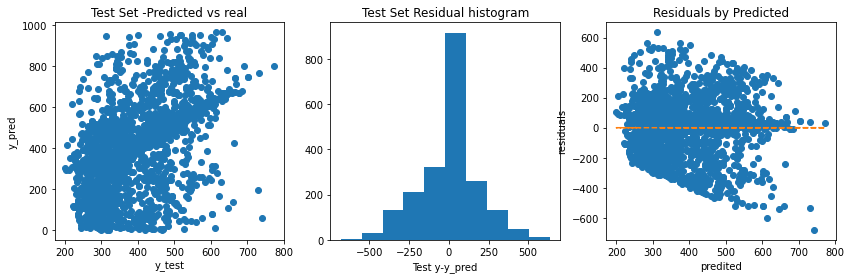

In [159]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [160]:
# MSE and MAE

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

33825.902423098145
134.12563929995397


In [161]:
##prediction on the train set

mse(y_train,y_pred_train)

32687.868624834595

In [162]:
R2=r2_score(y_test,y_pred)
R2

0.2078894971199502

In [164]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)